Vamos a trabajar con fish.csv. Es un fichero con todos los peces del juego de animal crossing new horizon para la switch.
En este caso quiero intentar calcular el tiempo que tardaría un jugador que juegue todos los días en capturar todas las especias.

Esto sería un calculo aproximado, luego cada jugador tendrá una habilidad diferente a la hora de capturar el pez, también depende
de la caña que use para capturarlos.


In [1]:
#Importamos pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importamos el csv
data_peces = pd.read_csv("./fish.csv")

#Mostramos la tabla
print(data_peces)

     #              Name   Sell Where/How       Shadow  \
0   56           anchovy    200       Sea        Small   
1   36         angelfish   3000     River        Small   
2   44          arapaima  10000     River     XX-Large   
3   41           arowana  10000     River        Large   
4   58   barred knifejaw   5000       Sea       Medium   
..  ..               ...    ...       ...          ...   
75  23           tilapia    800     River       Medium   
76  66              tuna   7000      Pier     XX-Large   
77  75       whale shark  13000       Sea  Large w/Fin   
78  21      yellow perch    300     River       Medium   
79  53  zebra turkeyfish    500       Sea       Medium   

    Total Catches to Unlock Spawn Rates Rain/Snow Catch Up       NH Jan  \
0                         0         2–5                 No  4 AM – 9 PM   
1                        20         2–5                 No          NaN   
2                        50           1                Yes          NaN   
3  

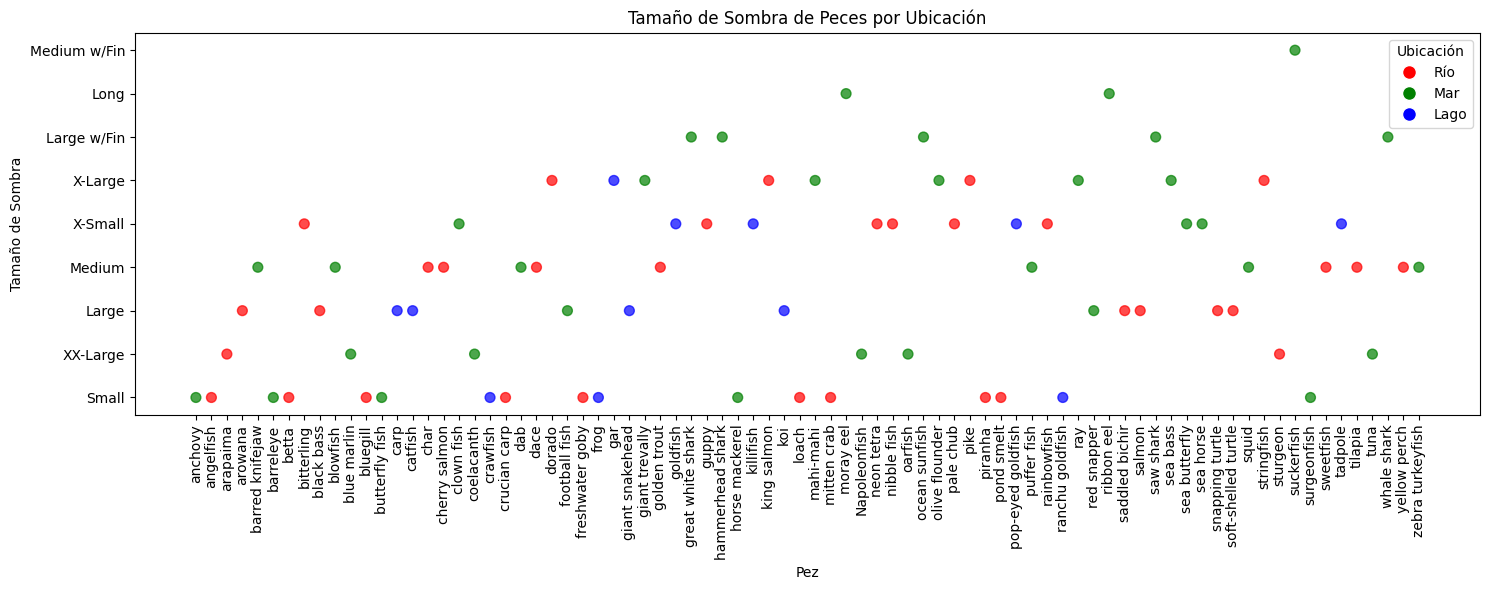

In [2]:
#Creamos un diccionario para los colores
location_colors = {"River": "red", "River (clifftop)": "red", "River (mouth)": "red", #Todos los de rio y sus variantes
                    "Sea": "green", "Sea (rainy days)": "green", "Pier": "green", #Todos los de mar y sus variantes, tambien se introdujo el muelle porque da al mar
                    "Pond": "blue"} #Lagos

# Crear el gráfico de dispersión con tamaños de sombra en el eje Y
plt.figure(figsize=(15, 6))
plt.scatter(data_peces.index, data_peces["Shadow"], c=data_peces["Where/How"].map(location_colors), s=50, alpha=0.7)

# Etiquetas y leyenda
plt.xticks(data_peces.index, data_peces["Name"], rotation=90)
plt.xlabel("Pez")
plt.ylabel("Tamaño de Sombra")
plt.title("Tamaño de Sombra de Peces por Ubicación")
legend_labels = [
    plt.Line2D([0], [0], marker='o', color='w', label='Río', markersize=10, markerfacecolor='red'),
    plt.Line2D([0], [0], marker='o', color='w', label='Mar', markersize=10, markerfacecolor='green'),
    plt.Line2D([0], [0], marker='o', color='w', label='Lago', markersize=10, markerfacecolor='blue')
]
plt.legend(handles=legend_labels, title='Ubicación')

# Mostrar el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vamos a intentar analizar los datos, con sus características, horarios, meses, ubicaciones... para poder capturar todas las especies.

In [3]:
print(data_peces.columns)

Index(['#', 'Name', 'Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Spawn Rates', 'Rain/Snow Catch Up', 'NH Jan', 'NH Feb', 'NH Mar',
       'NH Apr', 'NH May', 'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct',
       'NH Nov', 'NH Dec', 'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May',
       'SH Jun', 'SH Jul', 'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec',
       'Color 1', 'Color 2', 'Size', 'Lighting Type', 'Icon Filename',
       'Critterpedia Filename', 'Furniture Filename', 'Internal ID',
       'Unique Entry ID'],
      dtype='object')


In [4]:
#Hay columnas como el id interno, el id unico que para nuestro analisis no va a valer para nada, por lo que intentaremos limpiar las columnas que no necesitaremos
columnas_para_eliminar = ["Icon Filename", "Critterpedia Filename", "Furniture Filename", "Internal ID", "Unique Entry ID", "Color 1", "Color 2"]
data_peces = data_peces.drop(columns= columnas_para_eliminar)
print(data_peces.columns)

Index(['#', 'Name', 'Sell', 'Where/How', 'Shadow', 'Total Catches to Unlock',
       'Spawn Rates', 'Rain/Snow Catch Up', 'NH Jan', 'NH Feb', 'NH Mar',
       'NH Apr', 'NH May', 'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct',
       'NH Nov', 'NH Dec', 'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May',
       'SH Jun', 'SH Jul', 'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec',
       'Size', 'Lighting Type'],
      dtype='object')


In [5]:
# Intentamos poner el tiempo como tuplas para trabajar con ello
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for mes in meses:
    data_peces[f"NH {mes}"] = data_peces[f"NH {mes}"].str.extract(r'(\d+ [APM]+)')[0] #Trabajamos desde el hemisferio norte (NH)

In [6]:
#Creamos un diccionario para los tamaños, si lo pongo directamente como shadow los valores no salen ordenados
diccionario_tamanos = {
    "X-Small": "Super small",
    "Small": "Small",
    "Medium": "Medium",
    "Medium w/Fin": "Medium w/Fin",
    "Long": "Long",
    "Large": "Large",
    "X-Large": "Super Large",
    "XX-Large": "Super Ultra Large",
    "Large w/Fin": "Large w/Fin"    
}
data_peces["Shadow Size"] = data_peces["Shadow"].map(diccionario_tamanos)

In [7]:
#Investigamos cual es la cantidad de peces que pueden salir al mes 
cantidad_peces_x_mes = [data_peces[f"NH {mes}"].count() for mes in meses]

In [8]:
#frecuencia de los tamaños
frecuencia_tamanos_sombra = data_peces["Shadow"].value_counts()

In [9]:
#peces por ubicación
ubicaciones = data_peces["Where/How"].unique()
distribucion_x_ubicacion = [data_peces[data_peces["Where/How"] == ubicacion]["Where/How"].count() for ubicacion in ubicaciones]


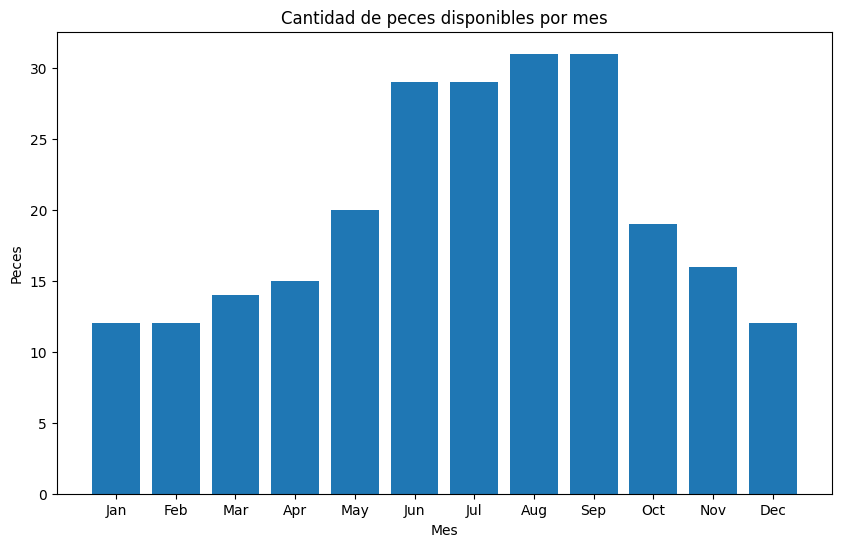

In [10]:
#Mostramos graficas:
#peces por mes
plt.figure(figsize=(10, 6))
plt.bar(meses, cantidad_peces_x_mes)
plt.xlabel("Mes")
plt.ylabel("Peces")
plt.title("Cantidad de peces disponibles por mes")
plt.show()

En esta gráfica podemos ver como en los meses de verano hay más peces que en invierno, para conseguir todos los peces habrá que jugar en todas las epocas para conseguirlos, pero en de junio a septiembre habría que jugar más ya que hay más peces para capturar.

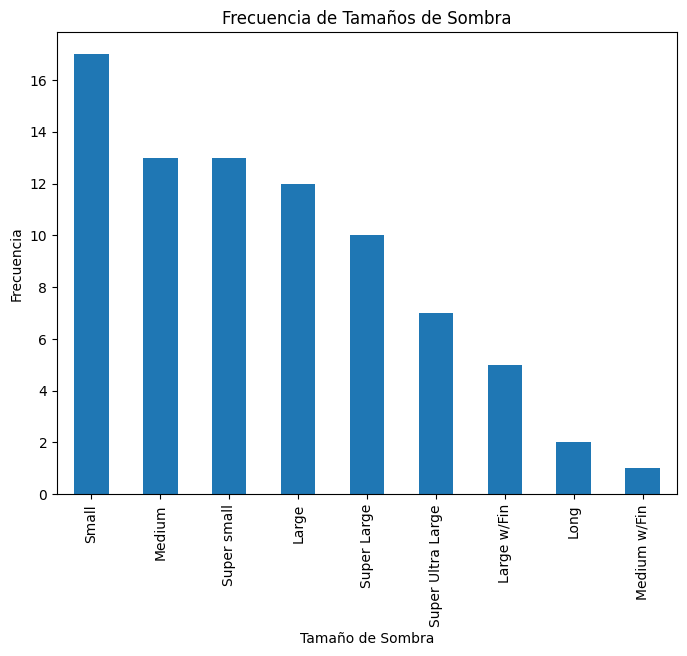

In [103]:
#frecuencia de las sombras
plt.figure(figsize=(8, 6))
#Usamos el diccionario que cree antes del tamaño para que salgan en orden
frecuencia_tamanos_sombra.index = frecuencia_tamanos_sombra.index.map(diccionario_tamanos) 
frecuencia_tamanos_sombra.plot(kind="bar")
plt.xlabel("Tamaño de Sombra")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Tamaños de Sombra")
plt.show()

Es esta gráfica vemos como hay muchos peces de tamaño pequeño y casi ninguno alargado, será más fácil en el juego ver y capturar peces pequeños antes que peces grandes, o alargados.

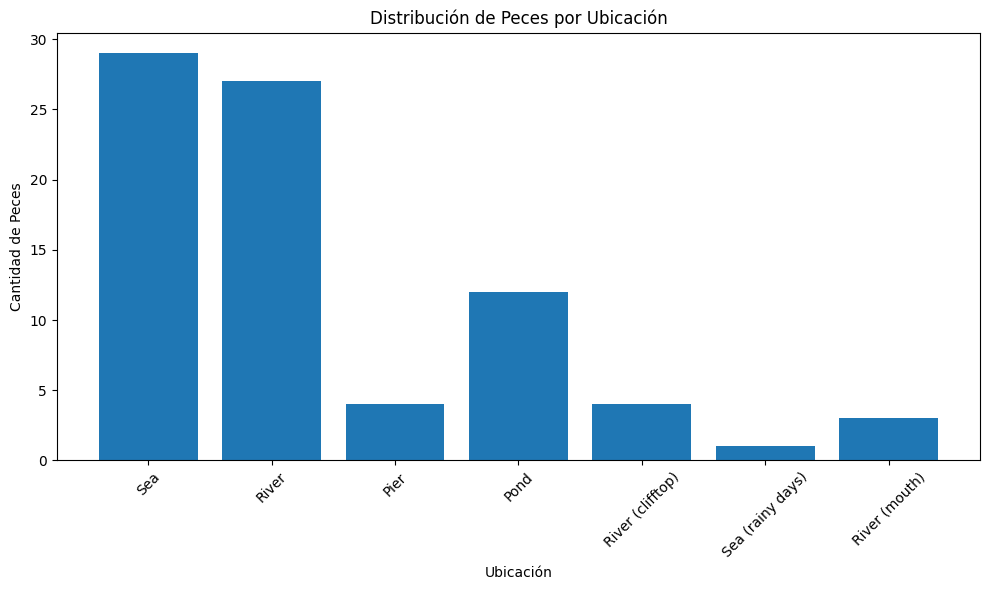

In [11]:
# 3. Gráfico de barras apiladas para la distribución de peces por ubicación
plt.figure(figsize=(10, 6))
plt.bar(ubicaciones, distribucion_x_ubicacion)
plt.xlabel("Ubicación")
plt.ylabel("Cantidad de Peces")
plt.title("Distribución de Peces por Ubicación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Y para terminar con la gráfica de ubicaciones, la mayoría de peces que encontremos va a ser en el mar o en el rio. Si es verdad que el muelle es parte del mar, pero solo se encontrarán allí 5 especias diferentes. Hay peces que solo apareceran en los ríos donde haya acantilados cerca o en la boca del rio, en caso de querer capturar muchos peces para venderlos solo habría que ir al mar y encontraremos la mayoría de especies.